In [120]:
import numpy as np
import scipy.stats as st

import pandas as pd
import sympy

from pprint import pprint

from bayex import marginalize
from bayex.mendelian import Genotype
import bayex.families as fam

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['hatch.linewidth'] = 0.01
#sns.set()

In [108]:
generators = [
    fam.unrelated,
    fam.third_cousins,
    fam.half_second_cousins,
    fam.second_cousins,
    fam.half_first_cousins,
    fam.first_cousins,
    fam.half_siblings,
    #fam.sibling_cousins,
    fam.siblings,
    fam.clones
]

In [109]:
#q = sympy.Symbol('q')
#g = Genotype({'AA': 1 - q, 'Aa': q})
#families =  [f(default=g) for f in generators]
#formulas = [f.infer_genotype('offspring').simplify() for f in families]

In [110]:
#rcoeffs = np.array([f.cofficient_of_relationship for f in families])
#s_ = lambda v: pd.Series(v, index=rcoeffs)
#p_aa = lambda qval: s_([f.eval({q: qval})['aa'] for f in formulas])
#p_num_aa_eq_0 = lambda qval, n: (1-p_aa(qval))**n
#p_num_aa_ge_0 = lambda qval, n: 1 - p_num_aa_eq_0(qval, n)

In [111]:
#pprint({r: (4*f['aa']).simplify() for r, f in zip(rcoeffs, formulas)})

In [112]:
#p_aa(0.01)*4

In [330]:
p_aa_s = lambda q, r: (q*r + q**2 *(1-r))/4
p_one_s = lambda n, q, r: 1 - (1-p_aa_s(q, r))**n
p_aa_t = lambda q, r: np.outer(q**2, np.ones_like(r)) + np.outer(q-q**2, r)/4
p_one_t = lambda n, q, r: 1 - (1-p_aa_t(q, r))**n

In [437]:
qs_exp = -np.linspace(1, 3, 9)
qs_exp_d = -np.linspace(0.5, 3.5, 101)
qs = 10**(qs_exp)
qs_d = 10**qs_exp_d
rs_exp = -np.arange(1, 10)
rs_exp_d = -np.linspace(0.5, 10.5, 101)
rs = 2.0**(rs_exp)
rs_d = 2.0**(rs_exp_d)

qlab = ['10^(-%.0f)'%e for e in qs_exp]
rlab = ['1/%.0f'%(2**e) for e in -rs_exp]
print(rs)

[0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312]


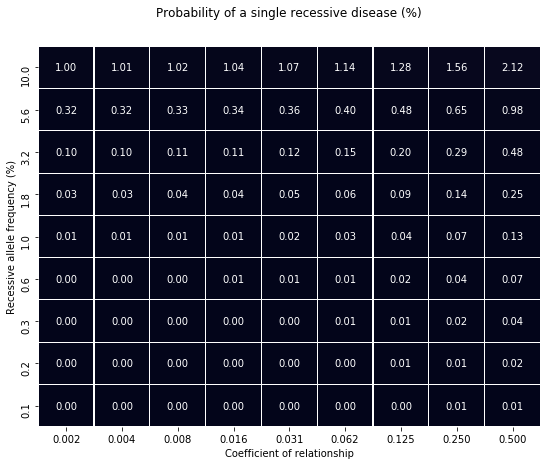

In [417]:
qsi = ['%.1f'%(q*100) for q in qs]
rsi = ['%.3f'%r for r in rs]
v = pd.DataFrame(p_aa_t(qs, rs), index=qsi, columns=rsi)*100
v.sort_index(axis=1, ascending=True, inplace=True)
fig, ax = plt.subplots(1,1,figsize=(9, 7))
sns.heatmap(v,
            xticklabels='auto',
            yticklabels='auto',
            linewidths=0.01,
            annot=True,
            fmt='.2f',
            vmin=0,
            vmax=100,
            cbar=False,
            ax=ax)
_ = ax.set(xlabel='Coefficient of relationship',
       ylabel='Recessive allele frequency (%)',
       title='Probability of a single recessive disease (%)')
fig.savefig('p_aa.pdf')

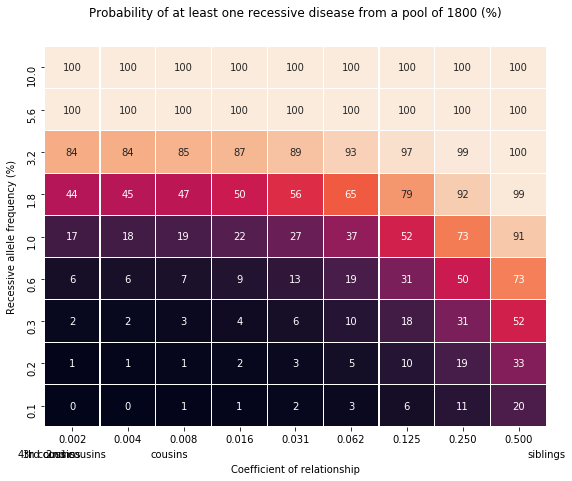

In [418]:
v = pd.DataFrame(p_one_t(1800, qs, rs), index=qsi, columns=rsi)*100
v.sort_index(axis=1, ascending=True, inplace=True)
fig, ax = plt.subplots(1,1,figsize=(9, 7))
ax = sns.heatmap(v,
            xticklabels='auto',
            yticklabels='auto',
            linewidths=0.01,
            annot=True,
            fmt='.0f',
            ax = ax,
            vmin=0,
            vmax=100,
            cbar=False)
ax.set_xlabel('Coefficient of relationship', labelpad=5)
ax.set_ylabel('Recessive allele frequency (%)', labelpad=10)
ax.set_title('Probability of at least one recessive disease from a pool of 1800 (%)')

labels = {
    #'i': 1,
    'siblings': 0.5,
    #'s/2': 0.25,
    'cousins': 0.125,
    #'c/2': 0.0625,
    '2nd cousins': 0.03125,
    #'u': 0.0,
    '3rd cousins': 0.03125/4,
    '4th cousins': 0.03125/16,
}
k = ax.get_xlim()[1] / rs[0]
ax.xaxis.set_minor_locator(FixedLocator([l*k for l in labels.values()]))
ax.xaxis.set_minor_formatter(FixedFormatter(list(labels.keys())))
ax.tick_params(axis='x',which='minor',bottom='off', pad=20, width=0.5)
fig.savefig('at_least_one.pdf')

siblings
cousins
2nd cousins
3rd cousins
4th cousins
9 9
81


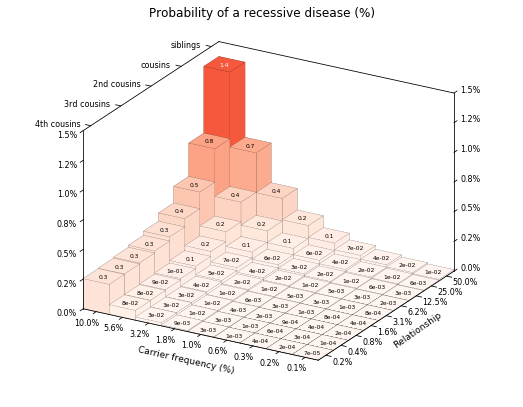

In [419]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
from matplotlib.collections import LineCollection

# setup the figure and axes
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')

def plot_line(from_, to, **kwargs):
    ax.plot3D(*zip(from_, to), **kwargs)

Qn = len(qs) # x
Rn = len(rs) # y
Pmax = 0.015

# x axis
plot_line((0, 0, Pmax), (Qn, 0, Pmax), linewidth=0.8, color='Black') # back
plot_line((0, Rn, 0), (Qn, Rn, 0), linewidth=0.8, color='Black') # front
ax.text3D(Qn*0.5, Rn+1, 0, 'Carrier frequency (%)', zdir=(1, -0.1, 0), fontdict={'size': 9}, va='top', ha='center')

# y axis
plot_line((Qn, 0, 0), (Qn, Rn, 0), linewidth=0.8, color='Black')
plot_line((0, 0, Pmax), (0, Rn, Pmax), linewidth=0.8, color='Black')
ax.text3D(Qn+0.75, Rn*0.6, 0, 'Relationship', zdir=(-0.1, 1, 0), fontdict={'size': 9}, va='center', ha='left')

# z axis
plot_line((Qn, 0, 0), (Qn, 0, Pmax), linewidth=0.8, color='Black') # Front
plot_line((0, Rn, 0), (0, Rn, Pmax), linewidth=0.8, color='Black') # Left

d = 0.2
for z in np.arange(0, 0.015+1e-9, 0.0025):
    plot_line((Rn, 0, z), (Rn, 0-d, z), linewidth=0.8, color='Black')
    ax.text3D(Rn, 0-2*d, z, '%.1f%%'%(z*100), fontdict={'size': 8}, va='center', ha='left')
    plot_line((0, Qn, z), (0, Qn+d, z), linewidth=0.8, color='Black')
    ax.text3D(0, Rn+2*d, z, '%.1f%%'%(z*100), fontdict={'size': 8}, va='center', ha='right')

for x in np.arange(Qn):
    plot_line((x+0.5, Rn, 0), (x+0.5, Rn+d, 0), linewidth=0.8, color='Black')
    ax.text3D(x+0.5, Qn+3.0*d, 0, '%.1f%%'%(qs[x]*100), fontdict={'size': 8}, va='top', ha='center')
        
for y in np.arange(Rn):
    plot_line((Qn, y+0.5, 0), (Qn+d, y+0.5, 0), linewidth=0.8, color='Black')
    ax.text3D(Qn+1.2*d, y+0.5, 0, '%.1f%%'%(rs[y]*100), fontdict={'size': 8}, va='top', ha='left')

for l, r in labels.items():
    print(l)
    y = -np.log2(r)-1
    plot_line((-d, y+0.5, Pmax), (0, y+0.5, Pmax), linewidth=0.8, color='Black')
    ax.text3D(-2*d, y+0.5, Pmax, l, fontdict={'size': 8}, va='center', ha='right')
    #ax.text3D(-d*1.2, y+0.5, 1, 'lala', fontdict={'size': 8}, va='top', ha='left')
    #ax.text3D(-d*1.2, y+0.5, 1, 'lala', fontdict={'size': 8}, va='top', ha='left')
 

Q, R = np.meshgrid(np.arange(Qn), np.arange(Rn))
Q, R = Q.ravel(), R.ravel()
top = np.array([p_aa_s(qs[i],rs[j]) for i, j in zip(Q,R)])
print(Qn, Rn)
print(len(top))

bottom = np.zeros_like(top)
width = depth = 1

n_colors = 10
#pal = sns.cubehelix_palette(as_cmap=True, n_colors=10, reverse=True)
#pal = sns.diverging_palette(250, 15, as_cmap=True, n=10, )
pal = matplotlib.cm.Reds
colors = top/Pmax*0.6

ax.bar3d(Q, R, bottom, width, depth, top, shade=False, zsort='max', color=pal(colors),
         edgecolor='Black', linewidth=.1
         )

for i, v in enumerate(top):
    color = 'White' if (colors[i] >= 0.50) else 'Black'
    fmt = '%.1f' if v > 0.001 else '%.0e'
    size = 7 if len(lab) <= 3 else 6
    ax.text3D(Q[i]+0.5, R[i]+0.5, v,  fmt%(v*100),
                  fontdict={'size': size}, va='center', ha='center', color=color)

ax.invert_yaxis()
#ax.set_zlim3d((0.00, 1))
ax.set_xlim3d((0.00, Qn))
ax.set_ylim3d((Rn, 0))
ax.xaxis._axinfo['grid']['color'] = 'Black'
ax.yaxis._axinfo['grid']['color'] = 'Black'
ax.zaxis._axinfo['grid']['color'] = 'Black'

ax.zaxis.set_visible(False)

x = [10, 10]
y = [0, 0]
z = [0, 1]

ax.set_axis_off()

ax.set_title('Probability of a recessive disease (%)')
plt.savefig('p_aa.pdf')

siblings
cousins
2nd cousins
3rd cousins
4th cousins
9 9
81


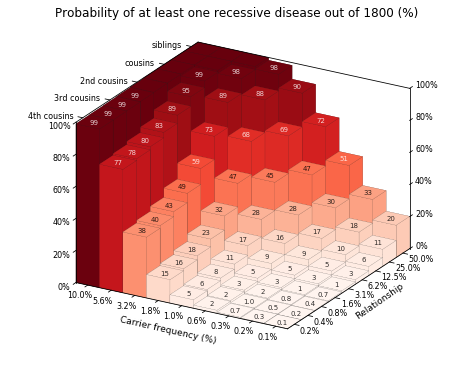

In [442]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
from matplotlib.collections import LineCollection

# setup the figure and axes
k= 0.9
fig = plt.figure(figsize=(k*9, k*7))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')

def plot_line(from_, to, **kwargs):
    ax.plot3D(*zip(from_, to), **kwargs)

Qn = len(qs) # x
Rn = len(rs) # y

# x axis
plot_line((0, 0, 1), (Qn, 0, 1), linewidth=0.8, color='Black') # back
plot_line((0, Rn, 0), (Qn, Rn, 0), linewidth=0.8, color='Black') # front
ax.text3D(Qn*0.5, Rn+1, 0, 'Carrier frequency (%)', zdir=(1, -0.1, 0), fontdict={'size': 9}, va='top', ha='center')

# y axis
plot_line((Qn, 0, 0), (Qn, Rn, 0), linewidth=0.8, color='Black')
plot_line((0, 0, 1), (0, Rn, 1), linewidth=0.8, color='Black')
ax.text3D(Qn+0.75, Rn*0.6, 0, 'Relationship', zdir=(-0.1, 1, 0), fontdict={'size': 9}, va='center', ha='left')

# z axis
plot_line((Qn, 0, 0), (Qn, 0, 1), linewidth=0.8, color='Black') # Right
plot_line((0, Rn, 0), (0, Rn, 1), linewidth=0.8, color='Black') # Left

d = 0.2
for z in np.arange(0, 1.2, 0.2):
    plot_line((Rn, 0, z), (Rn, 0-d, z), linewidth=0.8, color='Black')
    ax.text3D(Rn, 0-2*d, z, '%.0f%%'%(z*100), fontdict={'size': 8}, va='center', ha='left')
    plot_line((0, Qn, z), (0, Qn+d, z), linewidth=0.8, color='Black')
    ax.text3D(0, Rn+2*d, z, '%.0f%%'%(z*100), fontdict={'size': 8}, va='center', ha='right')

for x in np.arange(Qn):
    plot_line((x+0.5, Rn, 0), (x+0.5, Rn+d, 0), linewidth=0.8, color='Black')
    ax.text3D(x+0.5, Qn+3.0*d, 0, '%.1f%%'%(qs[x]*100), fontdict={'size': 8}, va='top', ha='center')
        
for y in np.arange(Rn):
    plot_line((Qn, y+0.5, 0), (Qn+d, y+0.5, 0), linewidth=0.8, color='Black')
    ax.text3D(Qn+1.2*d, y+0.5, 0, '%.1f%%'%(rs[y]*100), fontdict={'size': 8}, va='top', ha='left')

for l, r in labels.items():
    print(l)
    y = -np.log2(r)-1
    plot_line((-d, y+0.5, 1), (0, y+0.5, 1), linewidth=0.8, color='Black')
    ax.text3D(-2*d, y+0.5, 1, l, fontdict={'size': 8}, va='center', ha='right')
    #ax.text3D(-d*1.2, y+0.5, 1, 'lala', fontdict={'size': 8}, va='top', ha='left')
    #ax.text3D(-d*1.2, y+0.5, 1, 'lala', fontdict={'size': 8}, va='top', ha='left')
 
Q_, R_ = np.meshgrid(np.arange(Qn), np.arange(Rn))
Q, R = Q_.ravel(), R_.ravel()
top = np.array([p_one_s(1800, qs[i],rs[j]) for i, j in zip(Q,R)])
print(Qn, Rn)
print(len(top))

bottom = np.zeros_like(top)
width = depth = 1

n_colors = 10
#pal = sns.cubehelix_palette(as_cmap=True, n_colors=10, reverse=True)
#pal = sns.diverging_palette(250, 15, as_cmap=True, n=10, )

#pal = sns.cm.rocket
pal = matplotlib.cm.Reds
colors = pal(top)

ax.bar3d(Q, R, bottom, width, depth, top, shade=False, zsort='max', color=colors,
         edgecolor=(0.15, 0.15, 0.15), linewidth=0.1)

for i, v in enumerate(top):
    color = 'White' if (v >= 0.50) else 'Black'
    fmt = '%.1f' if v < 0.01 else '%.0f'
    if v < 0.995:
        ax.text3D(Q[i]+0.5, R[i]+0.5, v, fmt%(v*100), fontdict={'size': 7}, va='center', ha='center',
                  color=color, alpha=0.8)


ax.invert_yaxis()
ax.set_zlim3d((0.00, 1))
ax.set_xlim3d((0.00, Qn))
ax.set_ylim3d((Rn, 0))
ax.xaxis._axinfo['grid']['color'] = 'Black'
ax.yaxis._axinfo['grid']['color'] = 'Black'
ax.zaxis._axinfo['grid']['color'] = 'Black'

ax.zaxis.set_visible(False)

ax.set_axis_off()

ax.set_title('Probability of at least one recessive disease out of 1800 (%)')
plt.savefig('at_least_one.pdf')